In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

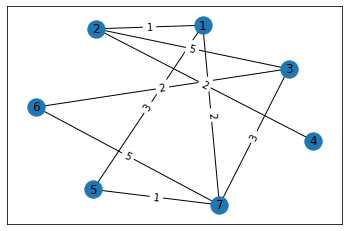

In [2]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([
    (1, 2, {'weight': 1}), (1, 5, {'weight': 3}), (1, 7, {'weight': 2}),
    (2, 4, {'weight': 2}), (2, 3, {'weight': 5}),
    (3, 7, {'weight': 3}), (3, 6, {'weight': 2}),
    (5, 7, {'weight': 1}),
    (6, 7, {'weight': 5}),
])

pos=nx.spring_layout(G, seed=5, k=10)
nx.draw_networkx(G,pos)

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

# Centrality
Identify the most important node, the center of the graph.

**<a href="#center">Center</a>**: $C(G) = \{ v \in V(G)|\epsilon(v) = rad(G) \}$

**<a href="#eccentricity_vertex_centrality">Eccentricity based vertex centrality</a>**: $c_E (u) = 1/\epsilon (u)$. Tells us to what exent a vertex is at the center of a graph, by considering its maximum distance to all other vertices. Vertices 'at the edge' of the network are generally considered less influential than those at its center.

**<a href="#closeness"> Closeness </a>**: to know how close a node is to all other nodes. $c_C(u) = 1/ (\Sigma_{v \in V(G)} d(u, v))$. The higher the value, the closer a vertex is to every other vertex.

**<a href="#betweenness"> Betweenness </a>**: if a vertex lies on many shortest paths connecting two other vertices, it is an important vertex. Removing it will directly influence the cost of the connectivity between other vertices, as other shortest paths will have to be followed. The fraction of shrotest paths that cross u.

Betweenness centrality: $c_B (u) = \Sigma_{x \neq y} \frac{|S(x, u, y)|}{|S(x, y)|}$

In [3]:
shortest_paths = dict(nx.all_pairs_dijkstra(G))

data = {}
for k in shortest_paths.keys():
    data[k] = {k: v for k, v in sorted(list(shortest_paths[k][0].items()))}
    
df = pd.DataFrame(data=data)
df

,1,2,3,4,5,6,7
1,0,1,5,3,3,7,2
2,1,0,5,2,4,7,3
3,5,5,0,7,4,2,3
4,3,2,7,0,6,9,5
5,3,4,4,6,0,6,1
6,7,7,2,9,6,0,5
7,2,3,3,5,1,5,0


<span id="center"></span>

#### Center

In [6]:
df['eccentricity'] = df.max(axis=0)
radius = df['eccentricity'].min()

df[df['eccentricity'] == radius]

,1,2,3,4,5,6,7,eccentricity
7,2,3,3,5,1,5,0,5


<span id='eccentricity_vertex_centrality'></span>

#### Eccentricity based vertex centraility


In [7]:
df['ecc_centrality'] = 1 / df['eccentricity']
df

,1,2,3,4,5,6,7,eccentricity,ecc_centrality
1,0,1,5,3,3,7,2,7,0.142857
2,1,0,5,2,4,7,3,7,0.142857
3,5,5,0,7,4,2,3,7,0.142857
4,3,2,7,0,6,9,5,9,0.111111
5,3,4,4,6,0,6,1,6,0.166667
6,7,7,2,9,6,0,5,9,0.111111
7,2,3,3,5,1,5,0,5,0.200000


<span id="closeness"></span>
#### Closeness

In [8]:
df['closeness'] = 1 / (df[[1, 2, 3, 4, 5, 6, 7]].sum())
df

,1,2,3,4,5,6,7,eccentricity,ecc_centrality,closeness
1,0,1,5,3,3,7,2,7,0.142857,0.047619
2,1,0,5,2,4,7,3,7,0.142857,0.045455
3,5,5,0,7,4,2,3,7,0.142857,0.038462
4,3,2,7,0,6,9,5,9,0.111111,0.031250
5,3,4,4,6,0,6,1,6,0.166667,0.041667
6,7,7,2,9,6,0,5,9,0.111111,0.027778
7,2,3,3,5,1,5,0,5,0.200000,0.052632


<span id="betweenness"></span>
#### Betweenness

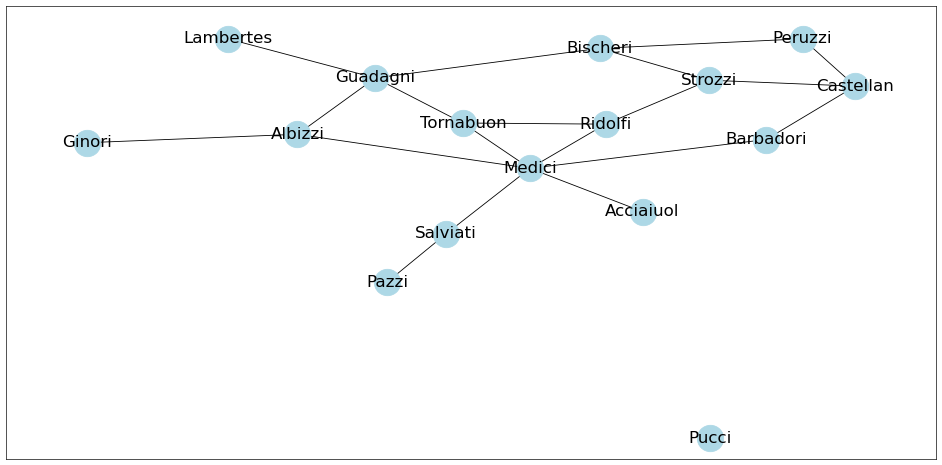

In [11]:
# social network, Florentine families begin 15th century
families = ['Pucci', 'Peruzzi', 'Bischeri', 'Guadagni', 'Lambertes',
           'Castellan', 'Strozzi', 'Ridolfi', 'Tornabuon', 'Albizzi', 'Barbadori', 'Medici',
           'Ginori', 'Acciaiuol', 'Salviati', 'Pazzi']
connections = [
    ('Peruzzi', 'Bischeri'), ('Peruzzi', 'Castellan'),
    ('Bischeri', 'Strozzi'), ('Bischeri', 'Guadagni'),
    ('Guadagni', 'Tornabuon'), ('Guadagni', 'Lambertes'),
    ('Castellan', 'Strozzi'), ('Castellan', 'Barbadori'),
    ('Strozzi', 'Ridolfi'),
    ('Ridolfi', 'Tornabuon'), ('Ridolfi', 'Medici'),
    ('Tornabuon', 'Medici'),
    ('Albizzi', 'Medici'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'),
    ('Barbadori', 'Medici'),
    ('Medici', 'Acciaiuol'), ('Medici', 'Salviati'),
    ('Salviati', 'Pazzi')
]

G = nx.Graph()
G.add_nodes_from(families)
G.add_edges_from(connections)

pos=nx.spring_layout(G, seed=2, scale=4, dim=2)

fig = plt.figure(1, figsize=(20, 10), dpi=60)
nx.draw_networkx(G, pos, node_size=1000, font_size=20, node_color='lightblue')

plt.show()

In [15]:
# The Medici's were on 50% of all shortest paths in the network. 
# The Medici's were seemingly in a much better position to exert power.
nx.betweenness_centrality(G)

{'Pucci': 0.0,
 'Peruzzi': 0.01904761904761905,
 'Bischeri': 0.10476190476190478,
 'Guadagni': 0.22539682539682537,
 'Lambertes': 0.0,
 'Castellan': 0.0761904761904762,
 'Strozzi': 0.06507936507936508,
 'Ridolfi': 0.07460317460317462,
 'Tornabuon': 0.07936507936507937,
 'Albizzi': 0.18412698412698417,
 'Barbadori': 0.1,
 'Medici': 0.45238095238095244,
 'Ginori': 0.0,
 'Acciaiuol': 0.0,
 'Salviati': 0.12380952380952381,
 'Pazzi': 0.0}